#Import the standard packages using the standard alias.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Reading our CSV file.


In [3]:
avi_df = pd.read_csv('AviationData.csv', encoding= 'ISO-8859-1',low_memory=False)
avi_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Next, we run df.info() on our data which helps us to identify the data types in each column of our data, it also shows the number of rows and columns and also we'll get to know which columns contain missing values.
We can also run df.isna().sum() which helps identify the number of missing values in each column.

In [4]:
avi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
# From this output we are able to tell that our data contains 88889 rows and 31 columns.
# The data contains a total of 88889  entries and from our columns we are able to tell that there are missing values but in columns index (0-3) there are no missing values since they all have a total of 88889 entries unlike the rest.
#Our data contains 26 columns with categorical data indicated by Ddtype object and 5 coulumns with numerical or continuous data indicated by Ddtye float64.

In [6]:
avi_df.shape

(88889, 31)

In [7]:
avi_df.isna().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

From the above information we are able to see the specific number of missing value in each column.
Those with a large number of missing values can be dropped and those with less can easily be replaced.

In [8]:
avi_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

The above function helps check whether our data has duplicated values which is indicated by the boolean value True. In our case the boolean value False shows that our data contains valid values.

In [9]:
#In this cell I was running .value_counts function in various columns to get the unique values and know what to replace the missing values with especially in categorical columns depending on which appeared most.
#avi_df['Location'].value_counts()
# avi_df['Country'].value_counts()
# avi_df['Make'].value_counts()
# avi_df['Model'].value_counts()
#avi_df['Airport.Name'].value_counts()
#avi_df['Registration.Number'].value_counts()






#Dealing with missing data.

For categorical columns with less missing values, we can fill in with the most common value that appears in that column using the function Mode.
For less missing values in numerical columns we can use mean or median.
For columns with a large number of missing values we use drop function.


In [10]:
avi_df['Location'].fillna(avi_df['Location'].mode()[0],inplace=True)
avi_df['Country'].fillna(avi_df['Country'].mode()[0],inplace=True)
avi_df['Make'].fillna(avi_df['Make'].mode()[0],inplace=True)
avi_df['Model'].fillna(avi_df['Model'].mode()[0],inplace=True)
avi_df['Airport.Name'].fillna(avi_df['Airport.Name'].mode()[0],inplace=True)


In [11]:
avi_df['Report.Status'].fillna('Unknown', inplace=True)
avi_df['Amateur.Built'].fillna('Unknown', inplace=True)
avi_df['Registration.Number'].fillna('Unknown',inplace=True)
avi_df['Injury.Severity'].fillna('Unknown',inplace=True)
avi_df['Aircraft.damage'].fillna('Unknown',inplace=True)
avi_df['Engine.Type'].fillna('Unknown',inplace=True)
avi_df['Purpose.of.flight'].fillna('Unknown',inplace=True)
avi_df['Weather.Condition'].fillna('Unknown',inplace=True)
avi_df['Total.Fatal.Injuries'].fillna(avi_df['Total.Fatal.Injuries'].median(), inplace=True)
avi_df['Total.Serious.Injuries'].fillna(avi_df['Total.Serious.Injuries'].median(), inplace=True)
avi_df['Total.Minor.Injuries'].fillna(avi_df['Total.Minor.Injuries'].median(), inplace=True)
avi_df['Total.Uninjured'].fillna(avi_df['Total.Uninjured'].median(), inplace=True)
avi_df['Number.of.Engines'].fillna(avi_df['Number.of.Engines'].median(), inplace=True)

In [12]:
avi_df.drop(columns=['Air.carrier'], inplace = True)
avi_df.drop(columns=['FAR.Description'], inplace = True)
avi_df.drop(columns=['Aircraft.Category'], inplace = True)
avi_df.drop(columns=['Longitude'], inplace = True)
avi_df.drop(columns=['Latitude'], inplace = True)
avi_df.drop(columns=['Schedule'], inplace=True)




In [13]:
avi_df.dropna(inplace=True) #drops the missing values in the remaining rows in our data.

In [14]:
avi_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

From the above information we can tell there are no missing values in our data compared to the same code that we had run initially.


In [15]:
avi_df.shape 
print(f'We have {avi_df.shape[0]} remaining columns and {avi_df.shape[1]} remaining rows in our data.')

We have 28272 remaining columns and 25 remaining rows in our data.


In [16]:
avi_df.columns #shows the column names remaining after dropping columns.

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

#Summarizng dataset using .groupby( ) method

In [17]:
#To find out the Country that recorded the highest number of fatal injuries.
#Assign this to the variable name 'Fatal_injuries'
Fatal_injuries= avi_df.groupby('Country')['Total.Fatal.Injuries'].max()
Fatal_injuries

#United States recordes the highest by 265 number of Total Fatal Injuries.


Country
ATLANTIC OCEAN                4.0
American Samoa                1.0
Antigua And Barbuda           0.0
Australia                     0.0
BLOCK 651A                    1.0
Bahamas                       2.0
Brazil                        0.0
CARIBBEAN SEA                 1.0
Canada                        0.0
Colombia                      0.0
Cuba                          0.0
El Salvador                   0.0
GULF OF MEXICO                0.0
HIGH ISLAND                   1.0
Haiti                        13.0
Honduras                      0.0
Jamaica                       0.0
Japan                         2.0
MISSING                       2.0
Mali                          0.0
Marshall Islands              0.0
Mauritius                     3.0
Netherlands                   0.0
Northern Mariana Islands      0.0
Philippines                   0.0
Puerto Rico                   3.0
St Kitts And Nevis            0.0
United States               265.0
Name: Total.Fatal.Injuries, dtype: float

In [18]:
avi_df.groupby(['Model','Make'])['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
 #AirbusIndustrie model-A300B4-605R recorded the highest with a total of 266 fatal injuries caused.

Model          Make              
A300B4-605R    Airbus Industrie      266.0
747-300        Boeing                229.0
DC-9-82        Mcdonnell Douglas     158.0
DC-10-10       Mcdonnell Douglas     111.0
PA-28-140      Piper                 110.0
                                     ...  
MINI 500       Culver-revolution       0.0
               Jones                   0.0
               Raser                   0.0
MINI IMP RC-2  Raymond C. Voegele      0.0
0-1A           Cessna                  0.0
Name: Total.Fatal.Injuries, Length: 6739, dtype: float64

In [19]:
avi_df.groupby(['Model','Make'])['Total.Fatal.Injuries'].count().sort_values(ascending=False)
 # Cessna model-152 had the highest number of accidents with fatal injuries.

Model       Make     
152         Cessna       1034
172         Cessna        553
172N        Cessna        522
PA-28-140   Piper         389
172M        Cessna        365
                         ... 
MUSTANG II  Homebuilt       1
            Hudson          1
            Lund            1
            Roe-wayne       1
0-1A        Cessna          1
Name: Total.Fatal.Injuries, Length: 6739, dtype: int64

In [20]:
Number_of_accidents = avi_df['Accident.Number'].count()
print(f'There were {Number_of_accidents} accidents in total.')

There were 28272 accidents in total.


In [21]:
avi_df.groupby(['Make','Model'])['Accident.Number'].count().sort_values(ascending=False)
 # Cessna model-152 recorded the highest number of accidents.

Make              Model           
Cessna            152                 1034
                  172                  553
                  172N                 522
Piper             PA-28-140            389
Cessna            172M                 365
                                      ... 
Madsen/rans       RANS S12 AIRAILE       1
Mahan             STARDUSTER II          1
Mahan Hardaway    QUICKIE Q2             1
Mahler            BD-4                   1
1977 Colfer-chan  STEEN SKYBOLT          1
Name: Accident.Number, Length: 6739, dtype: int64

In [22]:
avi_df.groupby(['Model','Make'])['Total.Uninjured'].sum().sort_values(ascending=False)
 #The output gives the aircrafts that had the highest number of unijnured people from largest to smallest.

Model         Make                          
DC-9-82       Mcdonnell Douglas                 2837.0
DC-10-10      Mcdonnell Douglas                 2488.0
747-400       Boeing                            2129.0
747           Boeing                            2071.0
737-300       Boeing                            2050.0
                                                 ...  
BUCCANEER II  Advance Aviation                     0.0
              Highcraft                            0.0
              Keuthan                              0.0
              South Mississippi Light Aircra       0.0
BL-7AC        Aeronca                              0.0
Name: Total.Uninjured, Length: 6739, dtype: float64

In [23]:
avi_df.groupby(['Model','Make'])['Total.Minor.Injuries'].agg(['sum','count']).sort_values(by=['sum','count'],ascending=[False,False])
#The aircraft Cess model-152 had the highest total number of minor injuries(195) and the highest number of incidents.

,,sum,count
Model,Make,,
152,Cessna,195.0,1034
PA-28-140,Piper,178.0,389
172,Cessna,154.0,553
172N,Cessna,148.0,522
DC-10-10,Mcdonnell Douglas,144.0,14
...,...,...,...
Zodiac CH 601 HDS,Polstra,0.0,1
Zodiac CH-601-H,Desimone,0.0,1
Zodiac CH601HDS,Gilbertson,0.0,1


In [24]:
avi_df['Aircraft.damage'].value_counts()

Substantial    21926
Destroyed       4830
Minor            943
Unknown          573
Name: Aircraft.damage, dtype: int64

In [25]:
avi_df.groupby(['Make', 'Model'])['Aircraft.damage'].value_counts().sort_values(ascending=False)
 #Cess model-152 had the highest number of substantial damages.

Make              Model          Aircraft.damage
Cessna            152            Substantial        933
                  172            Substantial        503
                  172N           Substantial        455
Piper             PA-28-140      Substantial        313
Cessna            172M           Substantial        309
                                                   ... 
Lockheed          250 TRI-GEAR   Destroyed            1
                  382G           Destroyed            1
                  L-1011         Substantial          1
                  L-1011-1       Unknown              1
1977 Colfer-chan  STEEN SKYBOLT  Substantial          1
Name: Aircraft.damage, Length: 8155, dtype: int64

In [31]:
avi_df.groupby('Weather.Condition')['Aircraft.damage'].count()

Weather.Condition
IMC         1789
UNK           89
Unknown       14
VMC        26380
Name: Aircraft.damage, dtype: int64

In [46]:
avi_df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

Purpose.of.flight
Personal                     4481.0
Unknown                      2343.0
Business                      574.0
Instructional                 573.0
Executive/corporate           198.0
Positioning                   184.0
Skydiving                     127.0
Other Work Use                 73.0
Public Aircraft                68.0
Ferry                          49.0
Aerial Application             33.0
Flight Test                    27.0
Aerial Observation             27.0
Air Race/show                  26.0
Banner Tow                      2.0
Glider Tow                      2.0
Public Aircraft - Federal       0.0
External Load                   0.0
Public Aircraft - Local         0.0
Public Aircraft - State         0.0
Air Drop                        0.0
Name: Total.Fatal.Injuries, dtype: float64

In [ ]:
avi_df.groupby('Engine.Type')['Event.Id'].count()
# Aircrats with Reciprocating engine type recorded the highest number of incidents.

Engine.Type
Reciprocating    24617
Turbo Fan          998
Turbo Jet          343
Turbo Prop        1243
Turbo Shaft        507
Unknown            564
Name: Event.Id, dtype: int64

#Data Visualization

Top 5 countries with fatal injuries

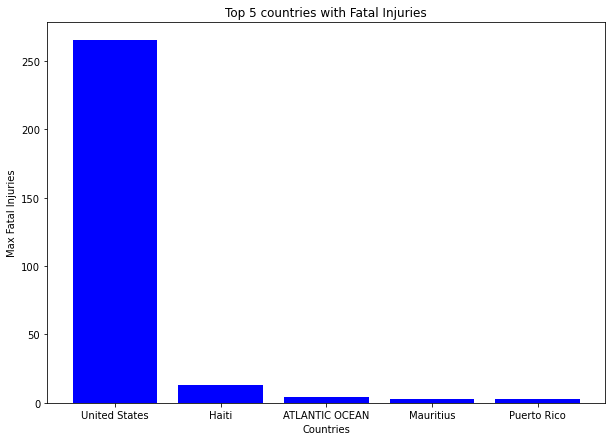

In [27]:
import matplotlib.pyplot as plt

Fatal_injuries= avi_df.groupby('Country')['Total.Fatal.Injuries'].max().sort_values(ascending=False)
Top_countries = Fatal_injuries.head(5)

plt.figure(figsize=(10,7))
plt.bar(Top_countries.index, Top_countries.values, color='blue')
plt.xlabel('Countries')
plt.ylabel('Max Fatal Injuries')
plt.title('Top 5 countries with Fatal Injuries')
plt.show()

Top 10 Aircraft models with highest number of accidents.

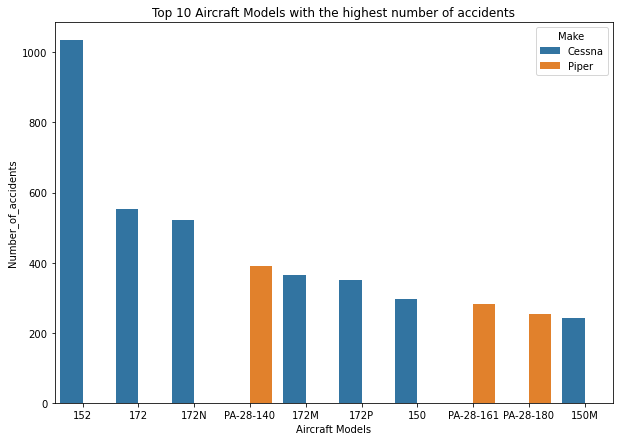

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Accident_counts = avi_df.groupby(['Make','Model'])['Accident.Number'].count().reset_index()
Accident_counts = Accident_counts.sort_values(by='Accident.Number',ascending=False)
Top_accidents = Accident_counts.head(10)

plt.figure(figsize=(10,7))
sns.barplot(data=Top_accidents,x='Model',y='Accident.Number', hue='Make')
plt.xlabel('Aircraft Models')
plt.ylabel('Number_of_accidents')
plt.title('Top 10 Aircraft Models with the highest number of accidents')
plt.show()





Number of Aircraft damages in various Weather Conditions.

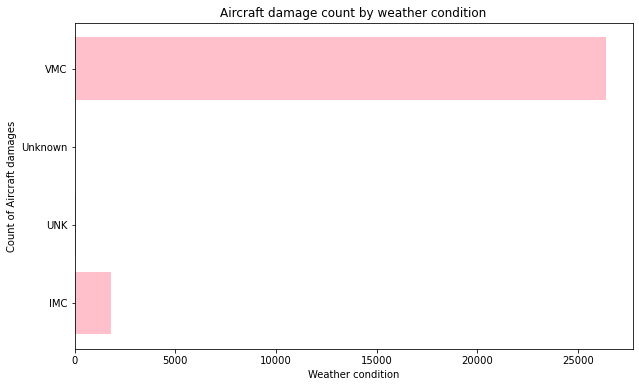

In [44]:
import matplotlib.pyplot as plt

damage_counts = avi_df.groupby('Weather.Condition')['Aircraft.damage'].count()

plt.figure(figsize=(10,6))
plt.barh(damage_counts.index, damage_counts.values, color='pink')
plt.title('Aircraft damage count by weather condition')
plt.xlabel('Weather condition')
plt.ylabel('Count of Aircraft damages')
plt.show()

Fatal injuries by Purpose of Flight

<function matplotlib.pyplot.show(close=None, block=None)>

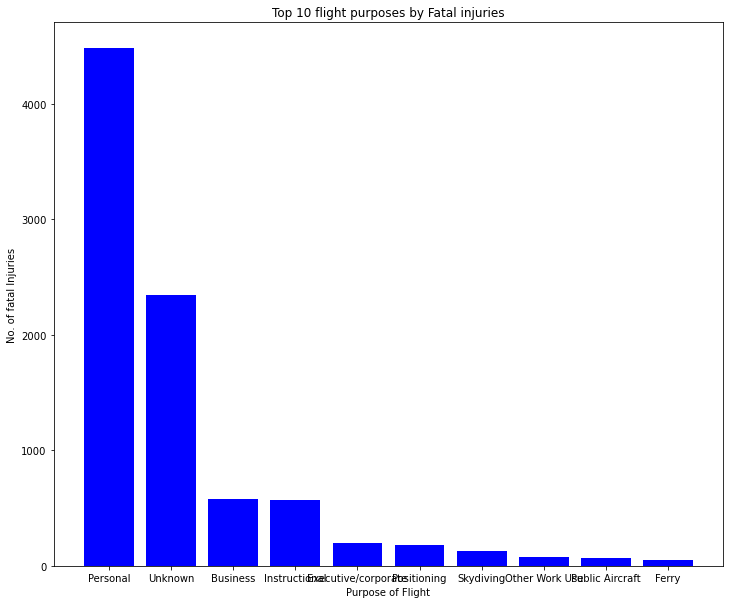

In [51]:
import matplotlib.pyplot as plt

Number_of_fatal_injuries_top10= avi_df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,10))
plt.bar(Number_of_fatal_injuries_top10.index, Number_of_fatal_injuries_top10.values, color='blue')
plt.title('Top 10 flight purposes by Fatal injuries')
plt.xlabel('Purpose of Flight')
plt.ylabel('No. of fatal Injuries')
plt.show

Saving the cleaned CSV data file to use in Tableau for visualization.

In [54]:
avi_df.to_csv('Cleaned_AviationData.csv', index=False) #index=false ensures that no index column is added.

The final cleaned dataset is now available for visualization in Tableau.